#                                    NAIVE BAYES

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [239]:
df = pd.read_csv("census_income.csv")
print(df.head())

   age         workclass     education  education-num      marital-status  \
0   52  Self-emp-not-inc       HS-grad              9  Married-civ-spouse   
1   31           Private       Masters             14       Never-married   
2   42           Private     Bachelors             13  Married-civ-spouse   
3   37           Private  Some-college             10  Married-civ-spouse   
4   30         State-gov     Bachelors             13  Married-civ-spouse   

        occupation   relationship                race     sex  capital-gain  \
0  Exec-managerial        Husband               White    Male             0   
1   Prof-specialty  Not-in-family               White  Female         14084   
2  Exec-managerial        Husband               White    Male          5178   
3  Exec-managerial        Husband               Black    Male             0   
4   Prof-specialty        Husband  Asian-Pac-Islander    Male             0   

   capital-loss  hours-per-week native-country income  
0     

In [240]:
print(num_col.shape)
print(cat_col.shape)

(17841, 6)
(17841, 8)


In [241]:
df.isnull().sum()  #check for null values

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [242]:
# income  ##here categorical feature is converted to numerical data
df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)

In [243]:
#income converted to numeric data
num_col = df.select_dtypes(exclude=["object_"])
cat_col = df.select_dtypes(exclude=["number"])
print("Categorial Data : ", cat_col.columns)
print("Numeric Data : ", num_col.columns)

Categorial Data :  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
Numeric Data :  Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')


In [244]:
df['workclass'].value_counts()   #we have ? as data

Private             12161
Self-emp-not-inc     1455
Local-gov            1243
?                     820
Self-emp-inc          817
State-gov             741
Federal-gov           597
Without-pay             4
Never-worked            3
Name: workclass, dtype: int64

In [245]:
df['occupation'].value_counts()  

Exec-managerial      2834
Prof-specialty       2750
Craft-repair         2222
Sales                2069
Adm-clerical         1795
Other-service        1480
Machine-op-inspct     950
Transport-moving      865
?                     823
Handlers-cleaners     604
Tech-support          534
Farming-fishing       453
Protective-serv       395
Priv-house-serv        65
Armed-Forces            2
Name: occupation, dtype: int64

In [246]:
df['native-country'].value_counts()  

United-States         16085
?                       318
Mexico                  260
Philippines             115
Germany                  89
Canada                   66
India                    59
Puerto-Rico              56
Cuba                     53
England                  51
Italy                    46
El-Salvador              46
China                    46
South                    39
Japan                    38
Jamaica                  38
Poland                   37
Vietnam                  37
Dominican-Republic       36
Columbia                 31
Taiwan                   29
Guatemala                29
Haiti                    27
Iran                     27
France                   22
Portugal                 15
Ecuador                  14
Peru                     14
Greece                   13
Cambodia                 13
Hong                     12
Nicaragua                12
Yugoslavia               11
Ireland                  11
Trinadad&Tobago          10
Laos                

                                #Filling missing data

In [247]:
df['workclass'] = df['workclass'].replace('?', 'Private') #replacing with mode
df['occupation'] = df['occupation'].replace('?', 'Exec-managerial')
df['native-country'] = df['native-country'].replace('?', 'United-States')

#Running NB on numerical data only with variables which has less dependency

In [248]:
print(df.corr())

                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.075006      0.088224      0.063668   
education-num   0.075006       1.000000      0.138364      0.095234   
capital-gain    0.088224       0.138364      1.000000     -0.046787   
capital-loss    0.063668       0.095234     -0.046787      1.000000   
hours-per-week  0.078374       0.178297      0.088020      0.070141   
income          0.287609       0.384054      0.194228      0.149148   

                hours-per-week    income  
age                   0.078374  0.287609  
education-num         0.178297  0.384054  
capital-gain          0.088020  0.194228  
capital-loss          0.070141  0.149148  
hours-per-week        1.000000  0.266722  
income                0.266722  1.000000  


/home/prudhvi/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:298: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

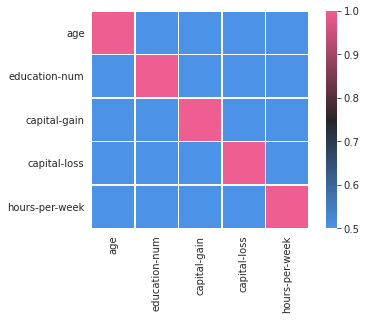

In [249]:
corr = df.iloc[:,:-1].corr(method = "pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center = "dark", as_cmap = True)
sns.heatmap(corr, vmax = 1, vmin = 0.5, cmap = cmap, square = True, Linewidths = .2)

#based on heat map all the numerical features are likely independent. So we will consider all numerical features

In [250]:
main_df = df[["age", "education-num", "capital-gain", "capital-loss", "hours-per-week", "income"]]
main_df.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,52,9,0,0,45,1
1,31,14,14084,0,50,1
2,42,13,5178,0,40,1
3,37,10,0,0,80,1
4,30,13,0,0,40,1
5,40,11,0,0,40,1
6,43,14,0,0,45,1
7,40,16,0,0,60,1
8,56,13,0,0,40,1
9,54,10,0,0,60,1


<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

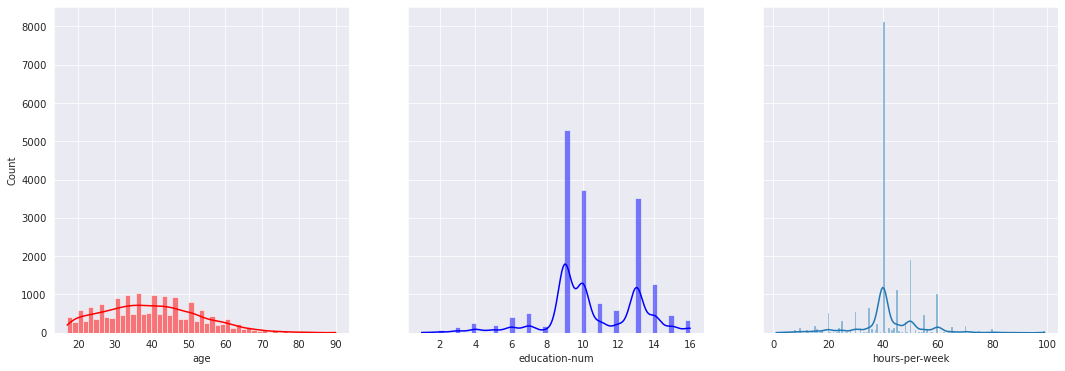

In [251]:
#checking distribution of data
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(main_df, ax=axes[0], x="age", kde=True, color='r')
sns.histplot(main_df, ax=axes[1], x="education-num", kde=True, color='b')

sns.histplot(main_df, ax=axes[2], x="hours-per-week", kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

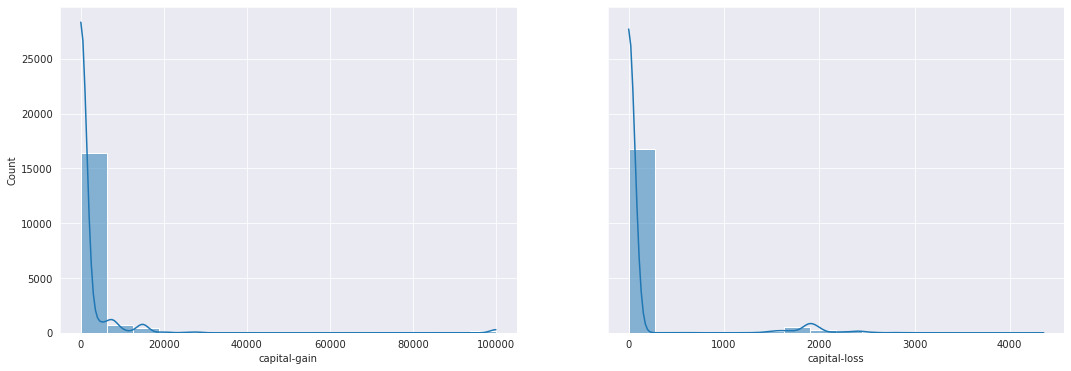

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(main_df, ax=axes[0], x="capital-gain", kde=True)
sns.histplot(main_df, ax=axes[1], x="capital-loss", kde=True)

In [253]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y] == i])/len(df))
    return prior

In [254]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    #gaussian distribution formula
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [255]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calculate_prior(df, Y)
    
    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [256]:
msk = np.random.rand(len(main_df)) < 0.8
train = main_df[msk]
test = main_df[~msk]
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="income")

from sklearn.metrics import confusion_matrix, f1_score
print("Accuracy for all the numerical features : ", f1_score(Y_test, Y_pred))

Accuracy for all the numerical features :  0.4337240757439135


#Removing the right skewed features :  capital-gain,capital-loss             

In [260]:
main_df = main_df[["age", "education-num", "hours-per-week", "income"]]

In [261]:
main_df.head(10)

,age,education-num,hours-per-week,income
0,52,9,45,1
1,31,14,50,1
2,42,13,40,1
3,37,10,80,1
4,30,13,40,1
5,40,11,40,1
6,43,14,45,1
7,40,16,60,1
8,56,13,40,1
9,54,10,60,1


In [262]:
#age, education-num, hours-per-week to predict income

#splitting data
msk = np.random.rand(len(main_df)) < 0.8
train = main_df[msk]
test = main_df[~msk]
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="income")

from sklearn.metrics import confusion_matrix, f1_score
print("Accuracy for limited the numerical features : ", f1_score(Y_test, Y_pred))

Accuracy for limited the numerical features :  0.7016661427224142


                                        #Handling categorical data

#since there are many categorical features try to reduce the number of categorical features
#education can be replaced made into 3 categories as school, high school, higher, undergrad, grad, doc

In [268]:
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [269]:
#martial status
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status']= df['marital-status'].replace(['Never-married'], 'not-married')
df['marital-status']= df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

<AxesSubplot:>

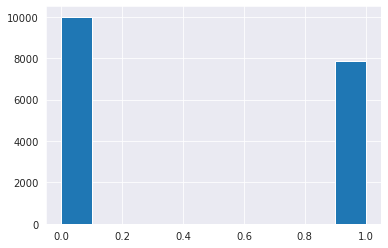

In [270]:
df['income'].hist() #graph for income

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

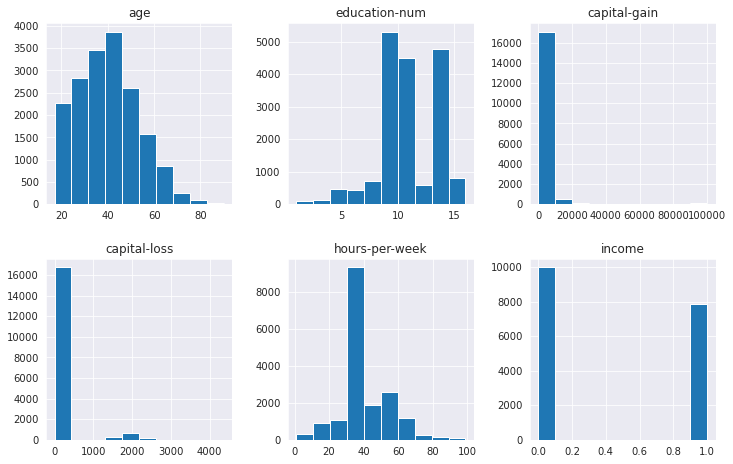

In [271]:
df.hist(figsize = (12, 12), layout = (3, 3), sharex = False)

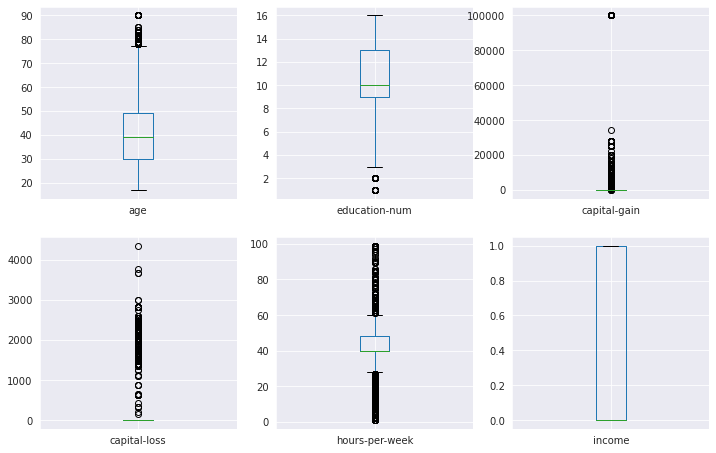

In [272]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);
##checking outliers

                                        #univariate

In [273]:
df.corr() #picking education-num since it has more correlation with income

,age,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.075006,0.088224,0.063668,0.078374,0.287609
education-num,0.075006,1.000000,0.138364,0.095234,0.178297,0.384054
capital-gain,0.088224,0.138364,1.000000,-0.046787,0.088020,0.194228
capital-loss,0.063668,0.095234,-0.046787,1.000000,0.070141,0.149148
hours-per-week,0.078374,0.178297,0.088020,0.070141,1.000000,0.266722
income,0.287609,0.384054,0.194228,0.149148,0.266722,1.000000


In [274]:
main_df = df[["age", "income"]]
main_df.head(10)


,age,income
0,52,1
1,31,1
2,42,1
3,37,1
4,30,1
5,40,1
6,43,1
7,40,1
8,56,1
9,54,1


In [275]:
##age as independent feature
msk = np.random.rand(len(main_df)) < 0.8
train = main_df[msk]
test = main_df[~msk]
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="income")

In [276]:
from sklearn.metrics import confusion_matrix, f1_score
print("Accuracy for limited the numerical features : ", f1_score(Y_test, Y_pred))

Accuracy for limited the numerical features :  0.5877109200891436


In [277]:
#education-num as feature
main_df = df[["education-num", "income"]]
main_df.head(10)
msk = np.random.rand(len(main_df)) < 0.8
train = main_df[msk]
test = main_df[~msk]
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="income")
from sklearn.metrics import confusion_matrix, f1_score
print("Accuracy for limited the numerical features : ", f1_score(Y_test, Y_pred))

Accuracy for limited the numerical features :  0.584733893557423


                        #convert categorical data into integers

In [278]:
df.select_dtypes(exclude=["number","bool_"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,high school,married,Exec-managerial,Husband,White,Male,United-States
1,Private,grad,not-married,Prof-specialty,Not-in-family,White,Female,United-States
2,Private,undergrad,married,Exec-managerial,Husband,White,Male,United-States
3,Private,higher,married,Exec-managerial,Husband,Black,Male,United-States
4,State-gov,undergrad,married,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
...,...,...,...,...,...,...,...,...
17836,Private,school,not-married,Exec-managerial,Own-child,Black,Male,United-States
17837,Private,high school,not-married,Handlers-cleaners,Own-child,White,Male,United-States
17838,Private,high school,not-married,Other-service,Other-relative,White,Male,United-States
17839,Private,school,not-married,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female,Philippines


In [279]:
df["native-country"].value_counts()
dummies_country = pd.get_dummies(df["native-country"])
new_df = pd.concat([df, dummies_country], axis = 'columns')
df = new_df

In [280]:
df.drop(['native-country', 'Yugoslavia'], axis=1, inplace=True)
print(df.shape)

(17841, 51)


In [281]:
df.education = df['education'].replace('school', 1)
df['education'] = df['education'].replace('higher', 2)
df['education'] = df['education'].replace('high school', 3)
df['education'] = df['education'].replace('undergrad', 4)
df['education'] = df['education'].replace('grad', 5)
df['education'] = df['education'].replace('doc', 6)

In [282]:
dummies_workclass = pd.get_dummies(df["workclass"])
new_df = pd.concat([df, dummies_workclass], axis = 'columns')
df = new_df

In [283]:
df.drop(['workclass', 'Private'], axis=1, inplace=True)  #dropping dummy variables
print(df.shape)

(17841, 57)


In [284]:
dummies_occupation = pd.get_dummies(df["occupation"])
new_df = pd.concat([df, dummies_occupation], axis = 'columns')
df = new_df
df.drop(['occupation', 'State-gov'], axis=1, inplace=True)

In [285]:
#Replacing male with 1 female with 2
print(df["sex"].unique())
df['sex'] = df['sex'].replace('Male', 1)
df['sex'] = df['sex'].replace('Female', 2)

['Male' 'Female']


In [286]:
dummies_race = pd.get_dummies(df["race"])
new_df = pd.concat([df, dummies_race], axis = 'columns')
df = new_df
df.drop(['race', 'White'], axis=1, inplace=True)

In [287]:
dummies_martial = pd.get_dummies(df["marital-status"])
new_df = pd.concat([df, dummies_martial], axis = 'columns')
df = new_df

In [288]:
df.drop(['marital-status', 'married'], axis=1, inplace=True)

In [289]:
df.drop(['relationship'], axis=1, inplace=True)

In [290]:
df.corr()[:]

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,income,Cambodia,Canada,...,Protective-serv,Sales,Tech-support,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,not-married,other
age,1.000000,0.119346,0.075006,-0.122290,0.088224,0.063668,0.078374,0.287609,-0.002266,0.009485,...,0.006032,-0.018720,-0.012896,0.016569,-0.021994,-0.007820,-0.036329,-0.036633,-0.511451,0.171829
education,0.119346,1.000000,0.732212,-0.053289,0.069667,0.077340,0.161644,0.299074,-0.009607,0.011927,...,-0.021687,0.000428,-0.007735,-0.087724,-0.025830,0.045704,-0.067119,-0.039282,-0.102184,-0.057700
education-num,0.075006,0.732212,1.000000,-0.053460,0.138364,0.095234,0.178297,0.384054,-0.017012,0.012803,...,-0.007063,0.011951,0.039540,-0.137283,-0.032762,0.058991,-0.081218,-0.054144,-0.090308,-0.084250
sex,-0.122290,-0.053289,-0.053460,1.000000,-0.048916,-0.052879,-0.246749,-0.260733,-0.012354,0.010908,...,-0.063243,-0.002925,-0.003010,-0.116325,0.029679,-0.012317,0.115287,0.018841,0.202776,0.332846
capital-gain,0.088224,0.069667,0.138364,-0.048916,1.000000,-0.046787,0.088020,0.194228,-0.002188,0.004806,...,-0.013622,0.014427,-0.014543,-0.023824,-0.008123,0.012677,-0.020492,0.000237,-0.065928,-0.025858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Asian-Pac-Islander,-0.007820,0.045704,0.058991,-0.012317,0.012677,0.000356,-0.003757,0.010832,0.146144,-0.006092,...,-0.012879,-0.011077,0.017252,-0.022722,-0.017298,1.000000,-0.055777,-0.015891,0.002513,-0.026002
Black,-0.036329,-0.067119,-0.081218,0.115287,-0.020492,-0.021275,-0.060231,-0.109333,-0.008152,-0.018395,...,0.030308,-0.029609,-0.007844,0.004489,-0.028260,-0.055777,1.000000,-0.025963,0.081053,0.078525
Other,-0.036633,-0.039282,-0.054144,0.018841,0.000237,-0.006030,-0.013319,-0.043088,-0.002322,-0.005241,...,0.004907,-0.008595,-0.003548,-0.001074,-0.008052,-0.015891,-0.025963,1.000000,0.019611,0.011535
not-married,-0.511451,-0.102184,-0.090308,0.202776,-0.065928,-0.064591,-0.203652,-0.396785,-0.001734,-0.006507,...,-0.032408,0.012924,0.001313,-0.042267,0.014989,0.002513,0.081053,0.019611,1.000000,-0.274795


/home/prudhvi/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:298: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

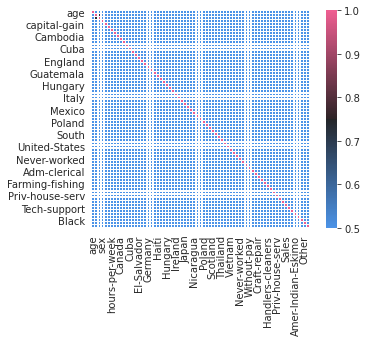

In [291]:
corr = df.iloc[:,:-1].corr(method = "pearson")
cmap = sns.diverging_palette(250, 354, 80, 60, center = "dark", as_cmap = True)
sns.heatmap(corr, vmax = 1, vmin = 0.5, cmap = cmap, square = True, Linewidths = .2)

#based on the heat map none of the features are dependent on each other

In [292]:
                        #combination of features(multi variate)

In [297]:
main_df = df[["age", "income"]]
main_df.head(10)#here education and education-num has high correlation. so drop one of them

,age,income
0,52,1
1,31,1
2,42,1
3,37,1
4,30,1
5,40,1
6,43,1
7,40,1
8,56,1
9,54,1


In [295]:
msk = np.random.rand(len(main_df)) < 0.8
train = main_df[msk]
test = main_df[~msk]
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="income")

In [296]:
from sklearn.metrics import confusion_matrix, f1_score
print("Accuracy for limited the numerical features : ", f1_score(Y_test, Y_pred))

Accuracy for limited the numerical features :  0.599367088607595
